<a href="https://colab.research.google.com/github/chindyfebryan/FlavourFinder/blob/main/model_interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=28d7facaeb9d17fafe9f2baf12dd3c2c14af379446cee99675a9c56444c33d26
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [11]:
!kaggle datasets download -d very133/dataset-flavourfinder

Dataset URL: https://www.kaggle.com/datasets/very133/dataset-flavourfinder
License(s): Community Data License Agreement - Sharing - Version 1.0
100% 104M/104M [00:07<00:00, 16.9MB/s]
100% 104M/104M [00:07<00:00, 14.9MB/s]


In [15]:
!unzip /content/dataset-flavourfinder.zip -d ./dataset

error:  must specify directory to which to extract with -d option


In [2]:
import lime
import lime.lime_image
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

In [3]:
model = load_model('/content/model.h5')

In [4]:
def load_class_names(filepath):
    with open(filepath, 'r') as file:
        class_names = file.read().splitlines()
    return class_names

In [7]:
class_names_file = 'class.txt'

class_names = load_class_names(class_names_file)

In [8]:
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

In [9]:
def predict_image(model, img_array):
    predictions = model.predict(img_array)
    return predictions

In [16]:
img_path = '/content/dataset/dataset/carrots/0002_jpg.rf.458d74c0b814a48bee460a2a49862348.jpg'
target_size = (224, 224)

img_array = preprocess_image(img_path, target_size)

predictions = predict_image(model, img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
confidence_score = np.max(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_index]

1/1 [==============================] - 3s 3s/step


In [19]:
print(f'Predicted class: {predicted_class_name}')
print(f'Confidence score: {confidence_score}')

Predicted class: carrots
Confidence score: 0.9974441528320312


In [17]:
explainer = lime.lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(image.img_to_array(image.load_img(img_path, target_size=target_size))/255.0,
                                         model.predict, top_labels=1, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


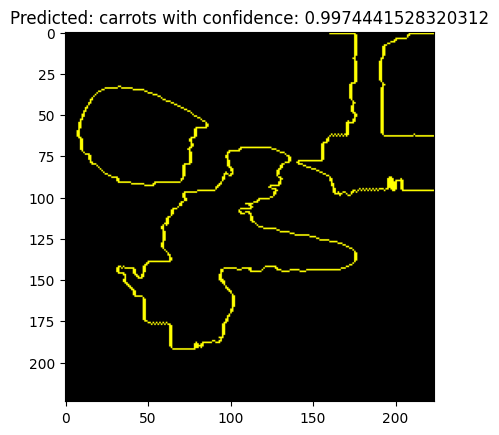

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry = mark_boundaries(temp / 255.0, mask)
plt.imshow(img_boundry)
plt.title(f'Predicted: {predicted_class_name} with confidence: {confidence_score}')
plt.show()